In [196]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pf
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [28]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [29]:
train_df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [30]:
test_df['SalePrice']=0

### Concatenating train and test data for applying eda at a time

In [31]:
new_df=pd.concat([train_df,test_df])
new_df.shape

(2919, 81)

In [32]:
df=new_df.copy()

In [33]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [34]:
df.shape

(2919, 81)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [36]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Features having null values more than 15% are droped.

In [37]:
df.drop(['PoolQC','Fence','MiscFeature','Alley','LotFrontage'],axis=1,inplace=True)

In [38]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

In [39]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,90491.588215
std,842.787043,42.517628,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,106496.379333
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000
25%,730.500000,20.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,0.000000
50%,1460.000000,50.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,34900.000000
75%,2189.500000,70.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,163000.000000
max,2919.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [40]:
df['BsmtQual'].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [41]:
df['BsmtCond'].value_counts()

TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [42]:

df['BsmtQual']=df['BsmtQual'].fillna('TA')
df['BsmtCond']=df['BsmtCond'].fillna('TA')

In [43]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

In [44]:
print(df['BsmtExposure'].value_counts())

print(df['BsmtFinType1'].value_counts())

print(df['BsmtFinType2'].value_counts())

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64


In [45]:
df['BsmtExposure']=df['BsmtExposure'].fillna('No')
df['BsmtFinType1']=df['BsmtFinType1'].fillna('Unf')
df['BsmtFinType2']=df['BsmtFinType2'].fillna('Unf')

All fireplace nan values are the places having no fireplace thus replace by NFP

In [46]:
df['FireplaceQu']=df['FireplaceQu'].fillna('NFP')

In [47]:
df['GarageType'].value_counts()

Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [48]:
df['GarageType']=df['GarageType'].fillna('Attchd')

In [49]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NFP,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [50]:
df[['YearBuilt','GarageYrBlt']]

,YearBuilt,GarageYrBlt
0,2003,2003.0
1,1976,1976.0
2,2001,2001.0
3,1915,1998.0
4,2000,2000.0
5,1993,1993.0
6,2004,2004.0
7,1973,1973.0
8,1931,1931.0
9,1939,1939.0


In [51]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['YearBuilt'])

In [52]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         1
BsmtFinType2       0
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath     

In [53]:
print(df['GarageFinish'].value_counts())
print(df['GarageQual'].value_counts())
print(df['GarageCond'].value_counts())

Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64
TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64
TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64


### Nan values in Garage features means No garage is the place thus replaced by 'NG'

In [54]:
df['GarageFinish']=df['GarageFinish'].fillna('NG')

df['GarageQual']=df['GarageQual'].fillna('NG')

df['GarageCond']= df['GarageCond'].fillna('NG')

In [55]:
df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          4
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType       24
MasVnrArea       23
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        1
BsmtFinType2      0
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [56]:
df['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [57]:
df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          4
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType       24
MasVnrArea       23
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        1
BsmtFinType2      0
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [58]:
df.shape

(2919, 76)

In [59]:
df[df['Electrical'].isnull()==True]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,NaN,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NFP,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,5,2008,WD,Normal,167500


In [60]:
df[df['Electrical'].isnull()==True].index

Int64Index([1379], dtype='int64')

In [61]:
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode())

In [62]:
df.shape

(2919, 76)

In [63]:
df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          4
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType       24
MasVnrArea       23
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        1
BsmtFinType2      0
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [64]:
df['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [65]:
df[df['MasVnrType'].isnull()==True][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN
231,NaN,NaN
246,NaN,NaN


In [66]:
df[df['MasVnrArea'].isnull()==True].index

Int64Index([ 234,  529,  650,  936,  973,  977, 1243, 1278,  231,  246,  422,
             532,  544,  581,  851,  865,  880,  889,  908, 1132, 1197, 1226,
            1402],
           dtype='int64')

In [67]:
df[df['MasVnrType'].isnull()==True].index

Int64Index([ 234,  529,  650,  936,  973,  977, 1243, 1278,  231,  246,  422,
             532,  544,  581,  851,  865,  880,  889,  908, 1132, 1150, 1197,
            1226, 1402],
           dtype='int64')

### Null values in MasVnrtype,MasVnrArea means house has no Veener thus None and 0 are used for replacement.

In [68]:
df['MasVnrType']=df['MasVnrType'].fillna('None')
df['MasVnrArea']=df['MasVnrArea'].fillna(0)

In [69]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        2
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       1
BsmtFinType2     0
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     2
BsmtHalfBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      1
TotRmsAbvGrd

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
MasVnrType       2919 non-

 ### Manual Encoding of all categorical features[](http://)

In [71]:
df['MSSubClass'].value_counts()


20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [72]:
ms_list=[20,30,40,45,50,60,70,75,80,85,90,120,160,180,190]
enc_list=[]
for i in ms_list:
    x=df[df['MSSubClass']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

enc_list


[[0.0, 20],
 [0.0, 30],
 [0.0, 70],
 [0.0, 80],
 [0.0, 85],
 [0.0, 90],
 [0.0, 120],
 [0.0, 160],
 [0.0, 190],
 [37900.0, 50],
 [80000.0, 180],
 [91750.0, 45],
 [106250.0, 40],
 [128000.0, 75],
 [156932.0, 60]]

In [73]:
for r in range(len(enc_list)):
    df['MSSubClass']=df['MSSubClass'].replace(enc_list[r][1],r+1)

In [74]:
df['MSSubClass'].value_counts()

1      1079
15      575
10      287
7       182
2       139
3       128
8       128
4       118
6       109
9        61
5        48
14       23
12       18
11       17
13        6
150       1
Name: MSSubClass, dtype: int64

In [75]:
df['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [76]:
ind_list=df['MSZoning'].value_counts().index
ind_list

Index(['RL', 'RM', 'FV', 'RH', 'C (all)'], dtype='object')

In [77]:

enc_list=[]
for i in ind_list:
    x=df[df['MSZoning']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

enc_list

[[0.0, 'C (all)'], [0.0, 'FV'], [0.0, 'RM'], [82500.0, 'RL'], [92800.0, 'RH']]

In [78]:

for r in range(len(enc_list)):
    df['MSZoning']=df['MSZoning'].replace(enc_list[r][1],r+1)

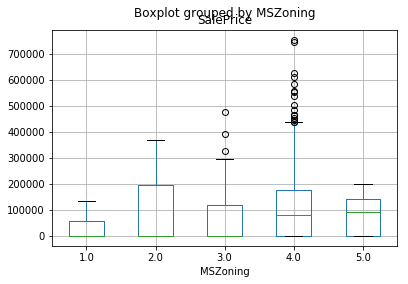

In [79]:
df.boxplot( by='MSZoning',column
           ='SalePrice')
plt.show()

In [80]:
df['Street']=df['Street'].replace({'Pave':1,'Grvl':0})

In [81]:
df['Street'].value_counts()

1    2907
0      12
Name: Street, dtype: int64

In [82]:
df['LotShape'].value_counts()

Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

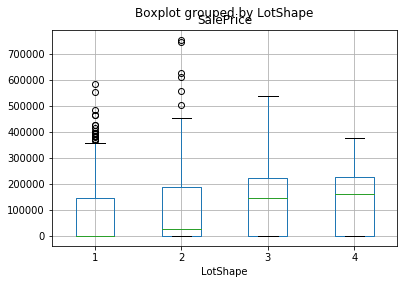

In [83]:
ind_list=df['LotShape'].value_counts().index
ind_list


enc_list=[]
for i in ind_list:
    x=df[df['LotShape']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

enc_list


for r in range(len(enc_list)):
    df['LotShape']=df['LotShape'].replace(enc_list[r][1],r+1)

df.boxplot( by='LotShape',column
           ='SalePrice')
plt.show()

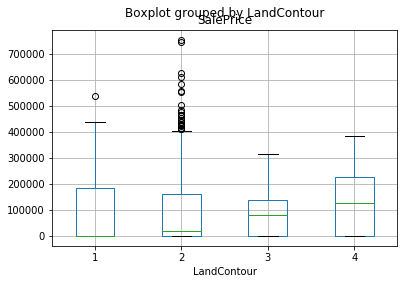

In [84]:
ind_list=df['LandContour'].value_counts().index
ind_list


enc_list=[]
for i in ind_list:
    x=df[df['LandContour']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()


for r in range(len(enc_list)):
    df['LandContour']=df['LandContour'].replace(enc_list[r][1],r+1)
    


df.boxplot( by='LandContour',column
           ='SalePrice')
plt.show()

In [85]:
df['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [86]:
df['Utilities']=df['Utilities'].replace({'NoSeWa':0,'AllPub':1})


In [87]:
df['LotConfig'].value_counts()

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

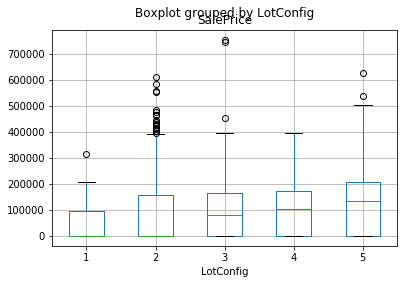

In [88]:
ind_list=df['LotConfig'].value_counts().index
ind_list


enc_list=[]
for i in ind_list:
    x=df[df['LotConfig']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()


for r in range(len(enc_list)):
    df['LotConfig']=df['LotConfig'].replace(enc_list[r][1],r+1)
    


df.boxplot( by='LotConfig',column
           ='SalePrice')
plt.show()

In [89]:
df['LandSlope'].value_counts()

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

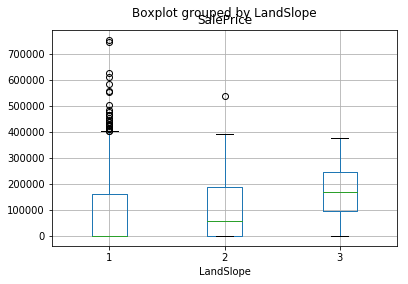

In [90]:
ind_list=df['LandSlope'].value_counts().index
ind_list


enc_list=[]
for i in ind_list:
    x=df[df['LandSlope']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()


for r in range(len(enc_list)):
    df['LandSlope']=df['LandSlope'].replace(enc_list[r][1],r+1)
    


df.boxplot( by='LandSlope',column
           ='SalePrice')
plt.show()

In [91]:
df['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

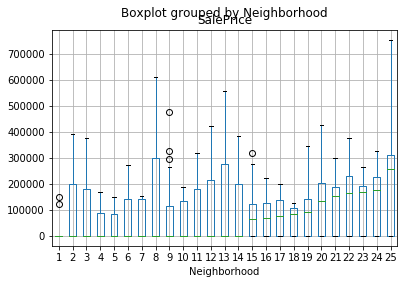

In [92]:
ind_list=df['Neighborhood'].value_counts().index
ind_list


enc_list=[]
for i in ind_list:
    x=df[df['Neighborhood']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()


for r in range(len(enc_list)):
    df['Neighborhood']=df['Neighborhood'].replace(enc_list[r][1],r+1)
    


df.boxplot( by='Neighborhood',column
           ='SalePrice')
plt.show()

In [93]:
print(df['Condition1'].value_counts())
print(df['Condition2'].value_counts())

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64
Norm      2889
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAe         1
RRAn         1
Name: Condition2, dtype: int64


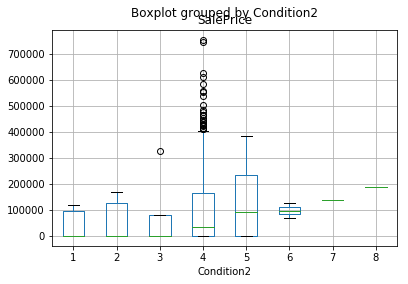

In [94]:
ind_list=df['Condition2'].value_counts().index
ind_list


enc_list=[]
for i in ind_list:
    x=df[df['Condition2']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()


for r in range(len(enc_list)):
    df['Condition2']=df['Condition2'].replace(enc_list[r][1],r+1)


df.boxplot( by='Condition2',column
           ='SalePrice')
plt.show()

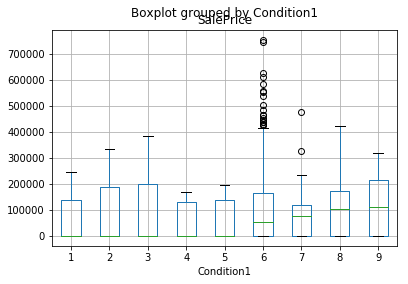

In [95]:
ind_list=df['Condition1'].value_counts().index
ind_list


enc_list=[]
for i in ind_list:
    x=df[df['Condition1']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()


for r in range(len(enc_list)):
    df['Condition1']=df['Condition1'].replace(enc_list[r][1],r+1)
                        
    


df.boxplot( by='Condition1',column
           ='SalePrice')
plt.show()

In [96]:
df['BldgType'].value_counts()

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

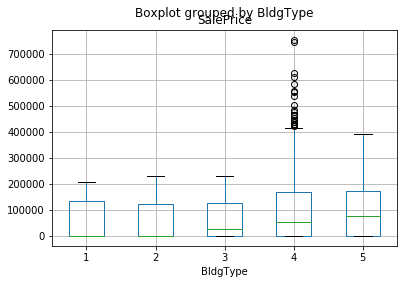

In [97]:
ind_list=df['BldgType'].value_counts().index
ind_list


enc_list=[]
for i in ind_list:
    x=df[df['BldgType']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()


for r in range(len(enc_list)):
    df['BldgType']=df['BldgType'].replace(enc_list[r][1],r+1)
                        
    


df.boxplot( by='BldgType',column
           ='SalePrice')
plt.show()

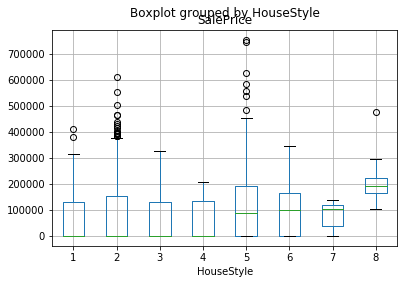

In [98]:
ind_list=df['HouseStyle'].value_counts().index
ind_list


enc_list=[]
for i in ind_list:
    x=df[df['HouseStyle']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()


for r in range(len(enc_list)):
    df['HouseStyle']=df['HouseStyle'].replace(enc_list[r][1],r+1)
                        
    

df.boxplot( by='HouseStyle',column
           ='SalePrice')
plt.show()

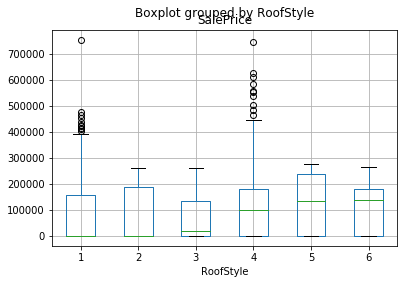

In [99]:
ind_list=df['RoofStyle'].value_counts().index
ind_list


enc_list=[]
for i in ind_list:
    x=df[df['RoofStyle']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()


for r in range(len(enc_list)):
    df['RoofStyle']=df['RoofStyle'].replace(enc_list[r][1],r+1)
                        
    

df.boxplot( by='RoofStyle',column
           ='SalePrice')
plt.show()

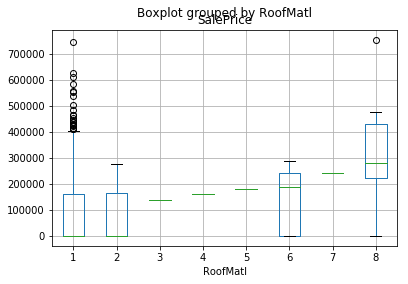

In [100]:
ind_list=df['RoofMatl'].value_counts().index
ind_list


enc_list=[]
for i in ind_list:
    x=df[df['RoofMatl']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()


for r in range(len(enc_list)):
    df['RoofMatl']=df['RoofMatl'].replace(enc_list[r][1],r+1)
                        
    


df.boxplot( by='RoofMatl',column
           ='SalePrice')
plt.show()

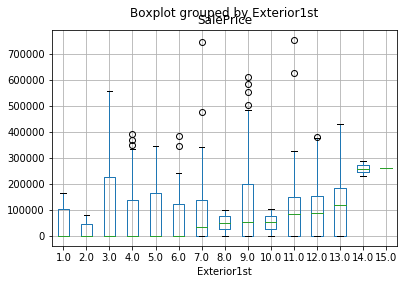

In [101]:
ind_list=df['Exterior1st'].value_counts().index
ind_list


enc_list=[]
for i in ind_list:
    x=df[df['Exterior1st']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()


for r in range(len(enc_list)):
    df['Exterior1st']=df['Exterior1st'].replace(enc_list[r][1],r+1)
                        
    


df.boxplot( by='Exterior1st',column
           ='SalePrice')
plt.show()

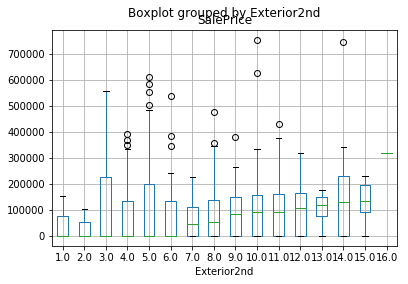

In [102]:
ind_list=df['Exterior2nd'].value_counts().index
ind_list


enc_list=[]
for i in ind_list:
    x=df[df['Exterior2nd']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()


for r in range(len(enc_list)):
    df['Exterior2nd']=df['Exterior2nd'].replace(enc_list[r][1],r+1)
                        
    


df.boxplot( by='Exterior2nd',column
           ='SalePrice')
plt.show()

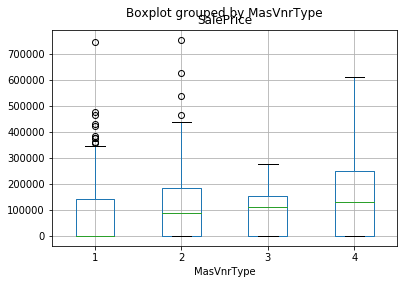

In [103]:
ind_list=df['MasVnrType'].value_counts().index
ind_list


enc_list=[]
for i in ind_list:
    x=df[df['MasVnrType']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()


for r in range(len(enc_list)):
    df['MasVnrType']=df['MasVnrType'].replace(enc_list[r][1],r+1)
                        
    


df.boxplot( by='MasVnrType',column
           ='SalePrice')
plt.show()

In [104]:
ind_list=df['ExterQual'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['ExterQual']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['ExterQual']=df['ExterQual'].replace(enc_list[r][1],r+1)
                            




ind_list=df['ExterCond'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['ExterCond']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['ExterCond']=df['ExterCond'].replace(enc_list[r][1],r+1)
                            




ind_list=df['Foundation'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['Foundation']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['Foundation']=df['Foundation'].replace(enc_list[r][1],r+1)
                           





ind_list=df['BsmtQual'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['BsmtQual']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['BsmtQual']=df['BsmtQual'].replace(enc_list[r][1],r+1)
                        
    





ind_list=df['BsmtCond'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['BsmtCond']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['BsmtCond']=df['BsmtCond'].replace(enc_list[r][1],r+1)
                            





ind_list=df['BsmtExposure'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['BsmtExposure']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['BsmtExposure']=df['BsmtExposure'].replace(enc_list[r][1],r+1)
                            




ind_list=df['BsmtFinType1'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['BsmtFinType1']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['BsmtFinType1']=df['BsmtFinType1'].replace(enc_list[r][1],r+1)
                            


In [105]:
ind_list=df['BsmtFinType2'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['BsmtFinType2']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['BsmtFinType2']=df['BsmtFinType2'].replace(enc_list[r][1],r+1)
                            



ind_list=df['Heating'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['Heating']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['Heating']=df['Heating'].replace(enc_list[r][1],r+1)
                            



ind_list=df['HeatingQC'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['HeatingQC']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['HeatingQC']=df['HeatingQC'].replace(enc_list[r][1],r+1)
                            




ind_list=df['CentralAir'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['CentralAir']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['CentralAir']=df['CentralAir'].replace(enc_list[r][1],r+1)




ind_list=df['Electrical'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['Electrical']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['Electrical']=df['Electrical'].replace(enc_list[r][1],r+1)
                            


In [106]:
ind_list=df['KitchenQual'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['KitchenQual']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['KitchenQual']=df['KitchenQual'].replace(enc_list[r][1],r+1)
                            



ind_list=df['Functional'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['Functional']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['Functional']=df['Functional'].replace(enc_list[r][1],r+1)
                            





ind_list=df['FireplaceQu'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['FireplaceQu']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['FireplaceQu']=df['FireplaceQu'].replace(enc_list[r][1],r+1)
                            



In [107]:
ind_list=df['GarageType'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['GarageType']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['GarageType']=df['GarageType'].replace(enc_list[r][1],r+1)
                            




ind_list=df['GarageFinish'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['GarageFinish']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['GarageFinish']=df['GarageFinish'].replace(enc_list[r][1],r+1)
                            





ind_list=df['GarageQual'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['GarageQual']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['GarageQual']=df['GarageQual'].replace(enc_list[r][1],r+1)
                            





ind_list=df['GarageCond'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['GarageCond']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['GarageCond']=df['GarageCond'].replace(enc_list[r][1],r+1)
                            





ind_list=df['PavedDrive'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['PavedDrive']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['PavedDrive']=df['PavedDrive'].replace(enc_list[r][1],r+1)
                            


In [108]:
list2=['GarageType'
,'GarageFinish'
,'GarageQual'
,'GarageCond'
,'PavedDrive']

In [109]:
ind_list=df['SaleCondition'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['SaleCondition']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['SaleCondition']=df['SaleCondition'].replace(enc_list[r][1],r+1)
                            





ind_list=df['SaleType'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['SaleType']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['SaleType']=df['SaleType'].replace(enc_list[r][1],r+1)
                            





ind_list=df['YrSold'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['YrSold']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['YrSold']=df['YrSold'].replace(enc_list[r][1],r+1)
                            



In [110]:
ind_list=df['YearBuilt'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['YearBuilt']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['YearBuilt']=df['YearBuilt'].replace(enc_list[r][1],r+1)
                            



In [111]:

ind_list=df['YearRemodAdd'].value_counts().index
ind_list

enc_list=[]
for i in ind_list:
    x=df[df['YearRemodAdd']==i]['SalePrice'].median()
    enc_list.append([x,i])

enc_list.sort()

for r in range(len(enc_list)):
    df['YearRemodAdd']=df['YearRemodAdd'].replace(enc_list[r][1],r+1)
                            


In [112]:
df.drop('GarageYrBlt',axis=1,inplace=True)

In [113]:
df.drop('GarageArea',axis=1,inplace=True)

In [114]:
df['MSZoning'].value_counts()

4.0    2265
3.0     460
2.0     139
5.0      26
1.0      25
Name: MSZoning, dtype: int64

In [116]:
df.drop(['MasVnrArea','BsmtFinSF1'],axis=1,inplace=True)


In [117]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        2
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     2
BsmtHalfBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      1
TotRmsAbvGrd     0
Functional       2
Fireplaces  

## Filling nan values with their median and mode.

In [137]:
df['MSZoning']=df['MSZoning'].fillna(df['MSZoning'].median())

df['Utilities']=df['Utilities'].fillna(1)
df['Exterior1st']=df['Exterior1st'].fillna(9)
df['Exterior2nd']=df['Exterior2nd'].fillna(5)
df['BsmtFinSF2']=df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].median())

df['BsmtUnfSF']=df['BsmtUnfSF'].fillna(0)
df['TotalBsmtSF']=df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median())
df['Electrical']=df['Electrical'].fillna(2)
df['BsmtFullBath']=df['BsmtFullBath'].fillna(0)
df['GarageCars']=df['GarageCars'].fillna(2)

df['SaleType']=df['SaleType'].fillna(6)

In [146]:
df['KitchenQual']=df['KitchenQual'].fillna(2)

In [147]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces  

In [ ]:
df.shape

# OLS Model for feature selection

In [148]:
import statsmodels.api as sm




training_df=df.iloc[0:1460,:]
testing_df=df.iloc[1460:,:]

X_train=training_df.drop(['SalePrice','Id'],axis=1)
y_train=training_df['SalePrice']

X_test=testing_df.drop('SalePrice',axis=1)

In [149]:
Xc=sm.add_constant(X_train)

model=sm.OLS(y_train,Xc).fit()

model.summary()

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     104.0
Date:                Sun, 01 Mar 2020   Prob (F-statistic):               0.00
Time:                        04:42:59   Log-Likelihood:                -17217.
No. Observations:                1460   AIC:                         3.457e+04
Df Residuals:                    1390   BIC:                         3.494e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.035e+04   4.85e+04     -1.862      0.063   -1.86e+05    4859.027
MSSubClass     -801.7697    279.954     -2.864      0.004   -1350.947    -252.592
MSZoning       4300.7825   1742.663      2.468      0.014     882.250    7719.315
LotArea           0.4449      0.112      3.961      0.000       0.225       0.665
Street         4.254e+04   1.44e+04      2.944      0.003    1.42e+04    7.09e+04
LotShape        453.1225   1743.101      0.260      0.795   -2966.271    3872.516
LandContour   -6727.1660   2331.096     -2.886      0.004   -1.13e+04   -2154.319
Utilities      2.373e+04   3.43e+04      0.692      0.489   -4.35e+04     9.1e+04
LotConfig      2637.1889   1132.836      2.328      0.020     414.936    4859.442
LandSlope      5848.1393   3837.293      1.524      0.128   -1679.372    1.34e+04
Neighborhood     54.2775    148.886      0.365      0.715    -237.788     346.343
Condition1     2297.1442    708.416      3.243      0.001     907.465    3686.823
Condition2    -1069.6261   3993.198     -0.268      0.789   -8902.972    6763.719
BldgType       -555.4398   1627.277     -0.341      0.733   -3747.624    2636.744
HouseStyle     -980.7033    699.698     -1.402      0.161   -2353.281     391.874
OverallQual    1.349e+04   1202.012     11.219      0.000    1.11e+04    1.58e+04
OverallCond    3987.5302    911.744      4.374      0.000    2198.988    5776.072
YearBuilt        23.5851     33.951      0.695      0.487     -43.015      90.185
YearRemodAdd     87.0195     59.428      1.464      0.143     -29.560     203.599
RoofStyle       257.6657    761.924      0.338      0.735   -1236.979    1752.310
RoofMatl       3070.3740   1621.200      1.894      0.058    -109.889    6250.637
Exterior1st     473.5543    357.814      1.323      0.186    -228.360    1175.468
Exterior2nd    -488.0540    382.988     -1.274      0.203   -1239.351     263.243
MasVnrType     -472.0460   1182.005     -0.399      0.690   -2790.753    1846.661
ExterQual     -1.526e+04   1865.988     -8.178      0.000   -1.89e+04   -1.16e+04
ExterCond      1325.1136   1270.524      1.043      0.297   -1167.239    3817.466
Foundation     -205.0403    999.637     -0.205      0.838   -2166.001    1755.920
BsmtQual      -7924.5414   1223.992     -6.474      0.000   -1.03e+04   -5523.470
BsmtCond       3875.9910   2257.891      1.717      0.086    -553.251    8305.233
BsmtExposure  -3543.5482   1229.312     -2.883      0.004   -5955.056   -1132.040
BsmtFinType1  -1992.6609    621.344     -3.207      0.001   -3211.534    -773.788
BsmtFinType2    -45.7719   1455.247     -0.031      0.975   -2900.489    2808.946
BsmtFinSF2      -10.1258      5.905     -1.715      0.087     -21.710       1.458
BsmtUnfSF        -8.5770      3.310     -2.591      0.010     -15.070      -2.084
TotalBsmtSF      15.4217      4.546      3.393   

In [150]:
cols=Xc.columns.tolist()
no_features=len(cols)
final_X=0
while no_features>0:
    X1=Xc[cols]
    final_X=X1
    model=sm.OLS(y_train,X1).fit()
    p=pd.Series(model.pvalues.values,index=cols)
    max_p_feature=p.idxmax()
    max_p=max(p)
    
    if max_p>0.05:
        cols.remove(max_p_feature)
    else:
        break
    

In [151]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     223.6
Date:                Sun, 01 Mar 2020   Prob (F-statistic):               0.00
Time:                        04:43:11   Log-Likelihood:                -17234.
No. Observations:                1460   AIC:                         3.453e+04
Df Residuals:                    1427   BIC:                         3.471e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.343e+04   2.15e+04     -2.019      0.044   -8.56e+04   -1243.087
MSSubClass    -836.2226    269.097     -3.108      0.002   -1364.091    -308.354
MSZoning      5256.2688   1622.320      3.240      0.001    2073.880    8438.657
LotArea          0.4932      0.102      4.853      0.000       0.294       0.693
Street        4.108e+04   1.41e+04      2.916      0.004    1.34e+04    6.87e+04
LandContour  -5554.3881   2183.932     -2.543      0.011   -9838.449   -1270.327
LotConfig     2647.4433   1059.032      2.500      0.013     570.016    4724.871
Condition1    2358.1354    682.707      3.454      0.001    1018.918    3697.353
OverallQual   1.406e+04   1135.172     12.383      0.000    1.18e+04    1.63e+04
OverallCond   3784.3371    845.310      4.477      0.000    2126.154    5442.520
ExterQual    -1.548e+04   1798.028     -8.608      0.000    -1.9e+04   -1.19e+04
BsmtQual     -7706.7875   1175.889     -6.554      0.000      -1e+04   -5400.130
BsmtCond      4722.0775   2186.562      2.160      0.031     432.858    9011.297
BsmtExposure -3799.3443   1187.659     -3.199      0.001   -6129.090   -1469.599
BsmtFinType1 -2239.9058    602.399     -3.718      0.000   -3421.589   -1058.223
BsmtUnfSF       -6.8293      2.989     -2.285      0.022     -12.693      -0.966
TotalBsmtSF     15.2266      4.255      3.578      0.000       6.879      23.574
HeatingQC    -1844.9474    644.939     -2.861      0.004   -3110.077    -579.818
1stFlrSF        42.3754      5.345      7.929      0.000      31.891      52.859
2ndFlrSF        41.1775      4.775      8.623      0.000      31.810      50.545
BsmtFullBath  8442.2524   2354.266      3.586      0.000    3824.059    1.31e+04
FullBath      1.179e+04   2489.887      4.737      0.000    6909.697    1.67e+04
HalfBath      8106.5449   2389.217      3.393      0.001    3419.791    1.28e+04
BedroomAbvGr -5470.3904   1623.824     -3.369      0.001   -8655.729   -2285.052
KitchenAbvGr -2.775e+04   4554.313     -6.093      0.000   -3.67e+04   -1.88e+04
KitchenQual  -2174.7180    951.785     -2.285      0.022   -4041.765    -307.671
TotRmsAbvGrd  2780.7973   1163.744      2.390      0.017     497.964    5063.631
Fireplaces    3861.4787   1663.498      2.321      0.020     598.314    7124.643
GarageCars    1.625e+04   1745.228      9.311      0.000    1.28e+04    1.97e+04
GarageCond    5491.4679   1688.428      3.252      0.001    2179.401    8803.535
WoodDeckSF      27.5231      7.456      3.691      0.000      12.897      42.149
ScreenPorch     45.6981     15.989      2.858      0.004      14.335      77.062
SaleType      3701.9924    738.295      5.014      0.000    2253.732    5150.253
==============================================================================
Omnibus:                      860.186   Durbin-Watson:                   1.992
Prob(Omni

In [152]:
final_X.columns

Index(['const', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LandContour',
       'LotConfig', 'Condition1', 'OverallQual', 'OverallCond', 'ExterQual',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageCond', 'WoodDeckSF',
       'ScreenPorch', 'SaleType'],
      dtype='object')

In [153]:
final_X.head()

,const,MSSubClass,MSZoning,LotArea,Street,LandContour,LotConfig,Condition1,OverallQual,OverallCond,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageCond,WoodDeckSF,ScreenPorch,SaleType
0,1.0,15,4.0,8450,1,2,2,6,7,5,3,4,3,3,1,150.0,856.0,1,856,854,1.0,2,1,3,1,4.0,8,0,2.0,2,0,0,6.0
1,1.0,1,4.0,9600,1,2,4,1,6,8,4,4,3,1,5,284.0,1262.0,1,1262,0,0.0,2,0,3,1,2.0,6,1,2.0,2,298,0,6.0
2,1.0,15,4.0,11250,1,2,2,6,7,5,3,4,3,2,1,434.0,920.0,1,920,866,1.0,2,1,3,1,4.0,6,1,2.0,2,0,0,6.0
3,1.0,3,4.0,9550,1,2,3,6,7,5,4,3,4,3,5,540.0,756.0,5,961,756,1.0,1,0,3,1,4.0,7,1,3.0,2,0,0,6.0
4,1.0,15,4.0,14260,1,2,4,6,8,5,3,4,3,4,1,490.0,1145.0,1,1145,1053,1.0,2,1,4,1,4.0,9,1,3.0,2,192,0,6.0


In [154]:
final_features=final_X.iloc[:,1:]
final_features.head()

,MSSubClass,MSZoning,LotArea,Street,LandContour,LotConfig,Condition1,OverallQual,OverallCond,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageCond,WoodDeckSF,ScreenPorch,SaleType
0,15,4.0,8450,1,2,2,6,7,5,3,4,3,3,1,150.0,856.0,1,856,854,1.0,2,1,3,1,4.0,8,0,2.0,2,0,0,6.0
1,1,4.0,9600,1,2,4,1,6,8,4,4,3,1,5,284.0,1262.0,1,1262,0,0.0,2,0,3,1,2.0,6,1,2.0,2,298,0,6.0
2,15,4.0,11250,1,2,2,6,7,5,3,4,3,2,1,434.0,920.0,1,920,866,1.0,2,1,3,1,4.0,6,1,2.0,2,0,0,6.0
3,3,4.0,9550,1,2,3,6,7,5,4,3,4,3,5,540.0,756.0,5,961,756,1.0,1,0,3,1,4.0,7,1,3.0,2,0,0,6.0
4,15,4.0,14260,1,2,4,6,8,5,3,4,3,4,1,490.0,1145.0,1,1145,1053,1.0,2,1,4,1,4.0,9,1,3.0,2,192,0,6.0


In [155]:
X_sk=pd.DataFrame()

for i in final_features:
    X_sk[i]=X_train[i]
 

In [156]:
X_test_sk=pd.DataFrame()

for i in final_features:
    X_test_sk[i]=X_test[i]

# Linear Regression Model with new set of features

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

sk_model=LinearRegression()
sk_model.fit(X_sk,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [158]:
y_train_pred=sk_model.predict(X_sk)
print('Model R2 score = ',r2_score(y_train,y_train_pred))
print('Model RMSE = ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

Model R2 score =  0.8337297163636153
Model RMSE =  32382.580609345223


# Model Building with RandomForest

In [160]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

In [273]:
rf=RandomForestRegressor(random_state=0)
param_grid={'criterion':['mse','mae'],'n_estimators':np.arange(1,30)}
GS_rf=GridSearchCV(rf,param_grid,cv=3,scoring='neg_mean_squared_error')
GS_rf.fit(X_sk,y_train)
GS_rf.best_params_

{'criterion': 'mae', 'n_estimators': 19}

In [276]:
rf_model=RandomForestRegressor(n_estimators=19,random_state=0,criterion='mae')
rf_model.fit(imp_X_sk,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=19, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [277]:
y_train_pred=rf_model.predict(X_sk)
print('Model R2 score = ',r2_score(y_train,y_train_pred))
print('Model RMSE = ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

Model R2 score =  0.8768063641761064
Model RMSE =  27873.93435096328


### Prediction on test data and storing predictions in csv format

In [164]:
y_test_pred=rf_model.predict(X_test_sk)
y_pred_df=pd.DataFrame(X_test['Id'])
y_pred_df['SalePrice']=y_test_pred

In [165]:
y_pred_df.head()

,Id,SalePrice
0,1461,128053.846154
1,1462,153216.346154
2,1463,162030.076923
3,1464,177005.076923
4,1465,201876.115385


In [167]:
y_pred_df.to_csv('House_Price_Prediction_rf.csv',index=False)

# XGboost Model

In [281]:
import xgboost as xgb

x_dmatrix=xgb.DMatrix(data=X_sk,label=y_train)


In [290]:
params={"eta"    : 0.1 ,
        'objective':'reg:squarederror',
         "max_depth"        : 8,
         "min_child_weight" : 3, 
         "gamma"            : 10,
         "colsample_bytree" :0.5,
        }

In [291]:
cv_results = xgb.cv(dtrain=x_dmatrix, params=params, nfold=5,
                    num_boost_round=1000,early_stopping_rounds=50,metrics="rmse", as_pandas=True, seed=0)

cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
233,1789.283692,156.669632,26107.426562,3937.010251
234,1775.160840,156.344448,26106.556641,3936.685244
235,1765.526123,157.652853,26105.639063,3936.503576
236,1756.382031,160.485467,26103.303906,3935.111532
237,1742.328638,157.770804,26103.215625,3935.399610


In [293]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.5, learning_rate = 0.1, min_child_weight = 3,
                max_depth = 8, alpha = 1, n_estimators = 238,gamma=10)

xg_reg.fit(X_sk,y_train)

y_train_pred=xg_reg.predict(X_sk)
print('Model R2 score = ',r2_score(y_train,y_train_pred))
print('Model RMSE = ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[06:32:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model R2 score =  0.9991650495610711
Model RMSE =  2294.7452794524415


## Important features by xgboost in barchart

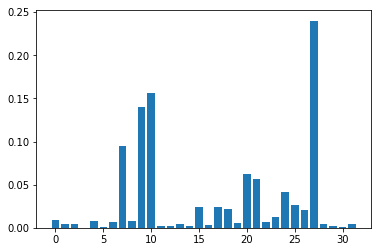

In [295]:

# plot
plt.bar(range(len(xg_reg.feature_importances_)), xg_reg.feature_importances_)
plt.show()

In [285]:
y_test_pred=xg_reg.predict(X_test_sk)
y_pred_df=pd.DataFrame(X_test['Id'])
y_pred_df['SalePrice']=y_test_pred


y_pred_df.to_csv('xg_predictions.csv',index=False)